# Explore here

In [20]:
import pandas as pd

dataset_seg = []
dataset_seg = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
dataset_seg.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
dataset_seg.shape

(1338, 7)

In [22]:
dataset_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
display(dataset_seg.describe(include="object").T)

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [24]:
display(dataset_seg.describe(include="number").T)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Existe un total de 1338 filas y 7 columnas, de entre las que encontramos el objetivo o clase a predecir, charge.
No existen valores nulos. 
Los datos cuentan con 4 características numéricas y 3 características categóricas.

In [25]:
dataset_seg.drop(["region"], axis=1, inplace=True)
dataset_seg.sample(10)

,age,sex,bmi,children,smoker,charges
1010,48,female,22.800,0,no,8269.04400
1192,58,female,32.395,1,no,13019.16105
407,47,female,23.600,1,no,8539.67100
117,29,female,27.940,1,yes,19107.77960
236,18,female,26.730,0,no,1615.76670
244,63,female,27.740,0,yes,29523.16560
325,40,male,34.105,1,no,6600.20595
188,41,female,32.200,1,no,6775.96100
78,22,female,39.805,0,no,2755.02095
608,28,male,26.980,2,no,4435.09420


In [26]:
dataset_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


ANALISIS UNIVARIANTE
Variables Categoricas

In [27]:
display(dataset_seg.describe(include="object").T)

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064


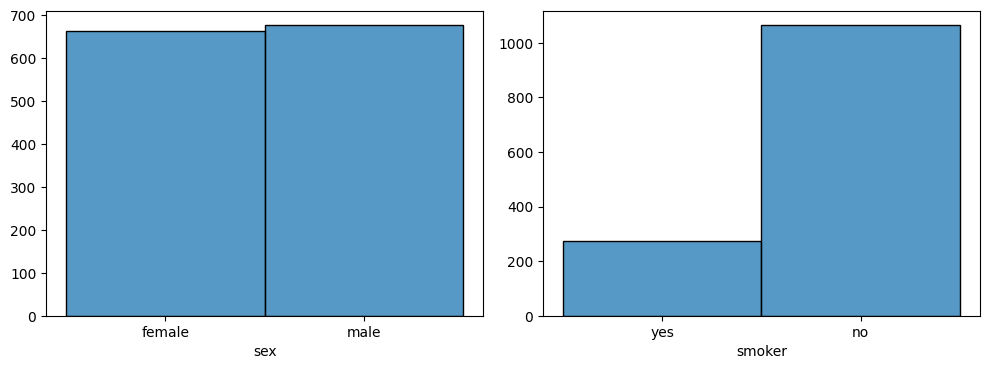

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.histplot(ax=axis[0, 0], data=dataset_seg, x="sex").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=dataset_seg, x="smoker").set(ylabel=None)
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])
plt.tight_layout()
plt.show()

En cuanto a la evaluacion de genero presentan valores similares. La poblacion de fumadores existe una gran diferencia entre fumadores y no fumadores siendo la gran mayoria no fumadores

Variables Numericas

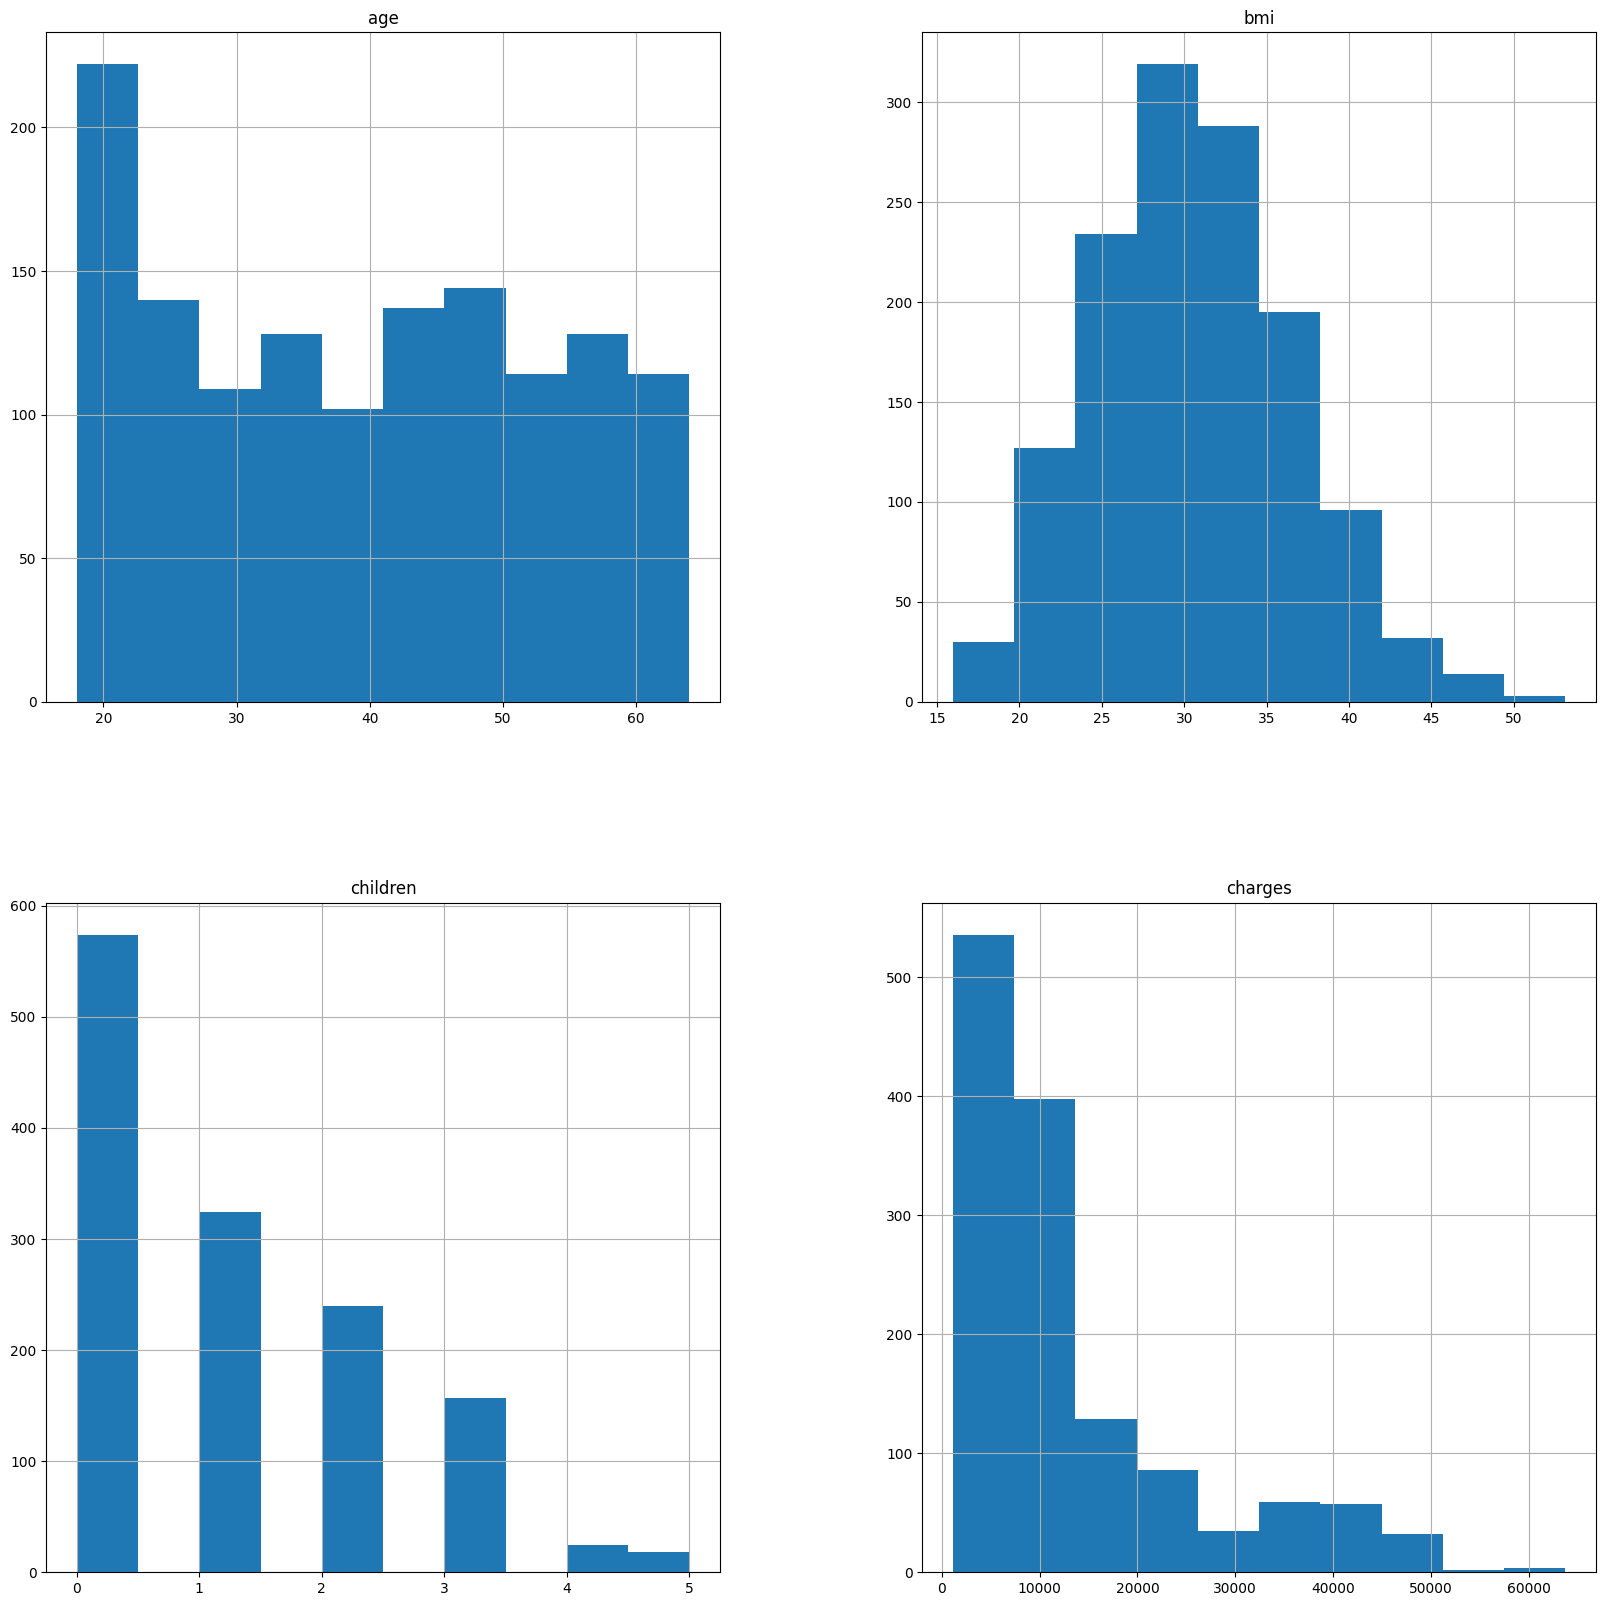

In [29]:
import matplotlib.pyplot as plt
dataset_seg.hist(figsize=(20,20))
plt.show()

En cuanto a la variable edad la mayor poblacion esta concentrada entre 20 y 25 años, siendo constante hasta los 60 años. El indice de masa corporal esta mas concentrado entre los valores de 25 y 35 bajando gradualmente a la izquierda y derecha respectivamente. La mayoria de la poblacion no tiene hijos y la cantidad va endescendo de 1 a 5. En cuanto a la prima del seguro medico esta mayormente concentrado entre 100 y 800.

Análisis de variables multivariante
Análisis numérico-numérico

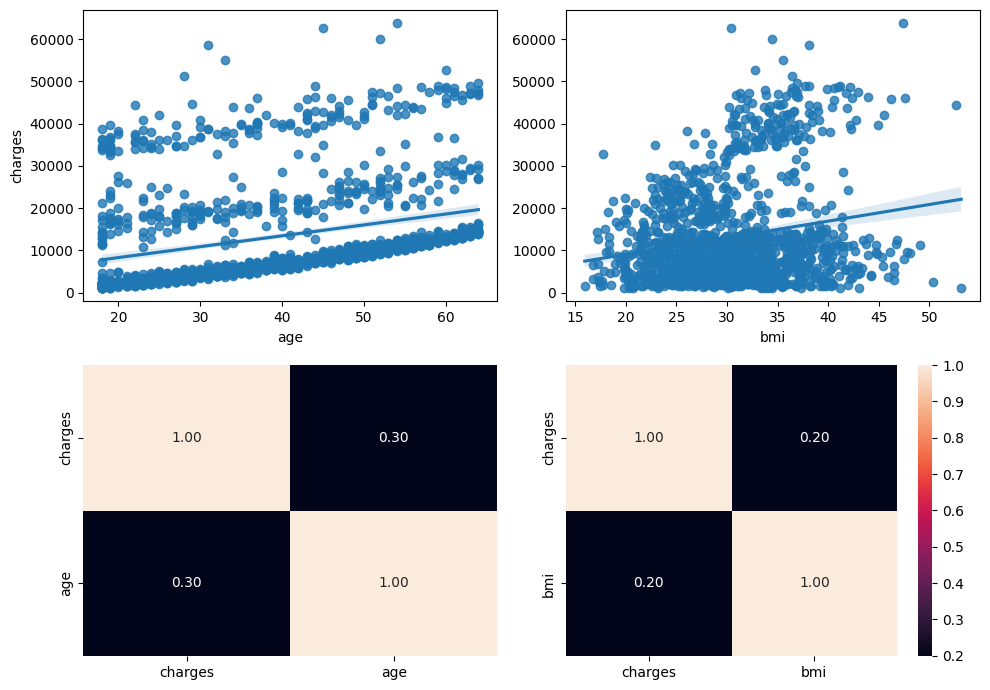

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataset_seg, x = "age", y = "charges")
sns.heatmap(dataset_seg[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset_seg, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(dataset_seg[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Charges/age: correlacion directa positiva con un coeficiente de 0.30
Charges/bmi: correlacion directa positiva con un coeficiente de 0.20

Análisis categórico-categórico

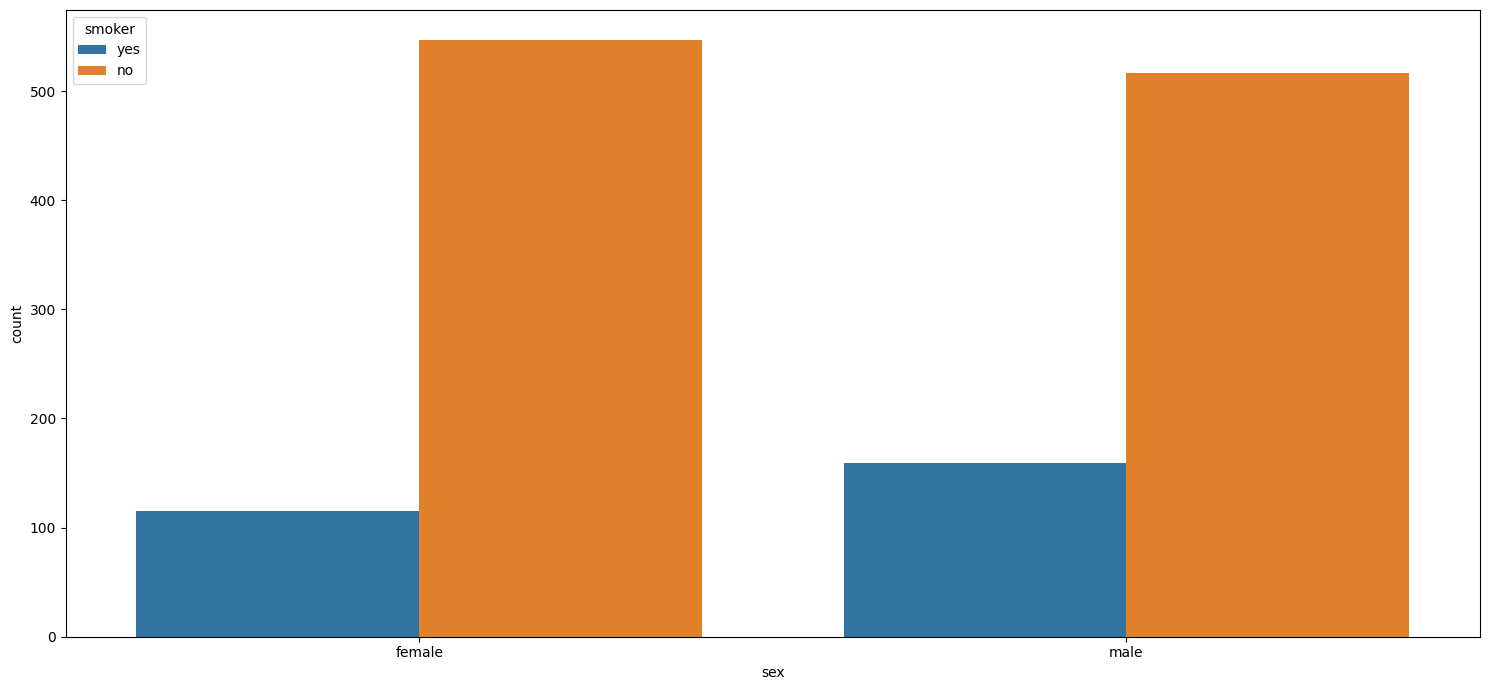

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 1, figsize=(15, 7))

sns.countplot(ax=axis, data=dataset_seg, x="sex", hue="smoker")


plt.tight_layout()

plt.show()


Tanto hombres como mujeres hay mayor poblacion de NO fumadores.

Análisis de correlaciones

In [32]:
dataset_seg.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


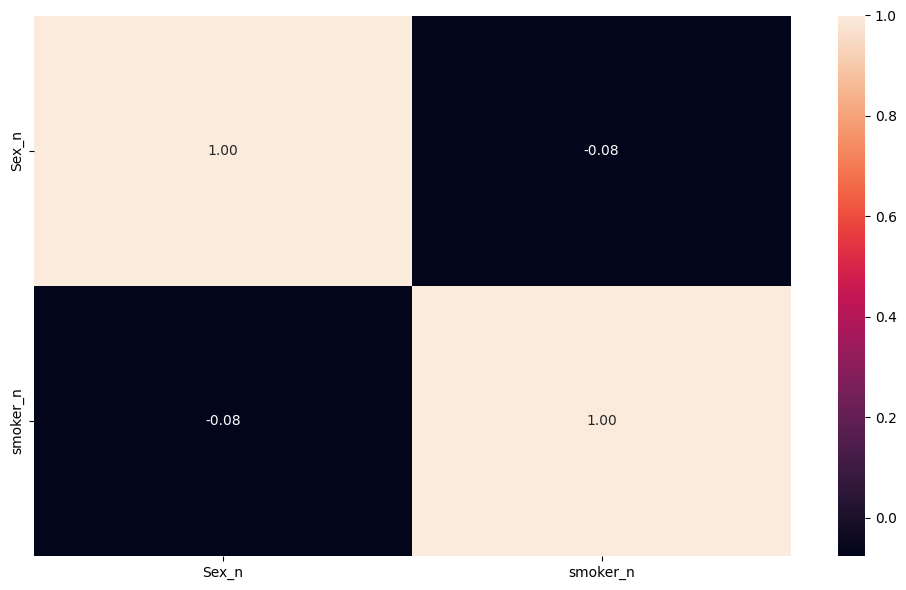

In [33]:
dataset_seg["Sex_n"] = pd.factorize(dataset_seg["sex"])[0]
dataset_seg["smoker_n"] = pd.factorize(dataset_seg["smoker"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dataset_seg[["Sex_n", "smoker_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Sex_n/smoker_n: correlacion baja negativa.

Análisis numérico-categórico (completo)

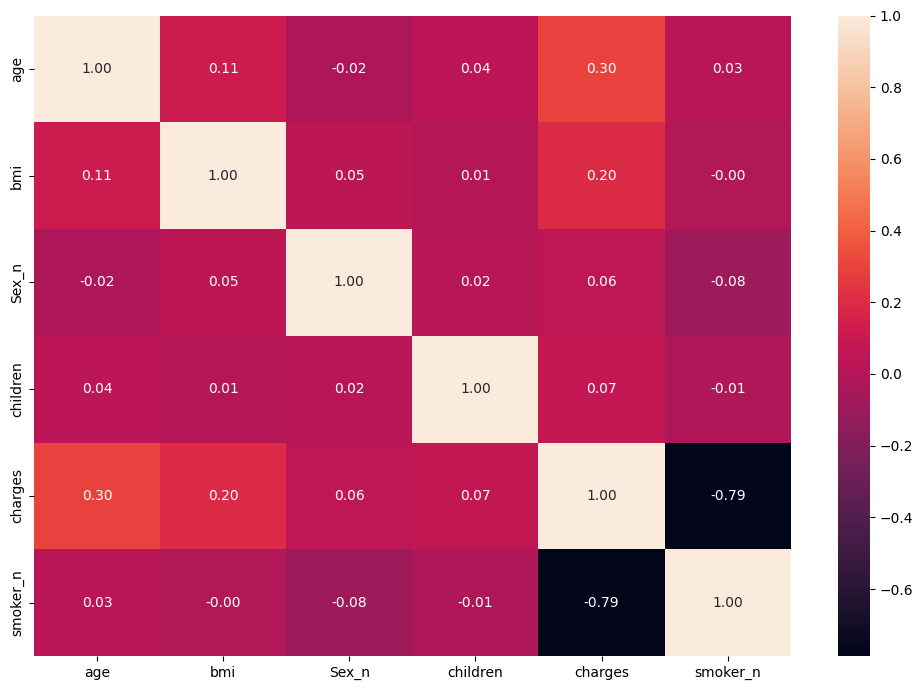

In [34]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(dataset_seg[["age", "bmi", "Sex_n", "children", "charges", "smoker_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

smoker_n/charges: correlacion alta de tipo negativa con un coeficiente de -0.79
charges/bmi: correlacion media de tipo positiva con un coeficiente de 0.20
El resto de las correlaciones no aportan valores significativos al analisis

Ingeniería de características

In [35]:
dataset_seg.describe()

,age,bmi,children,charges,Sex_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


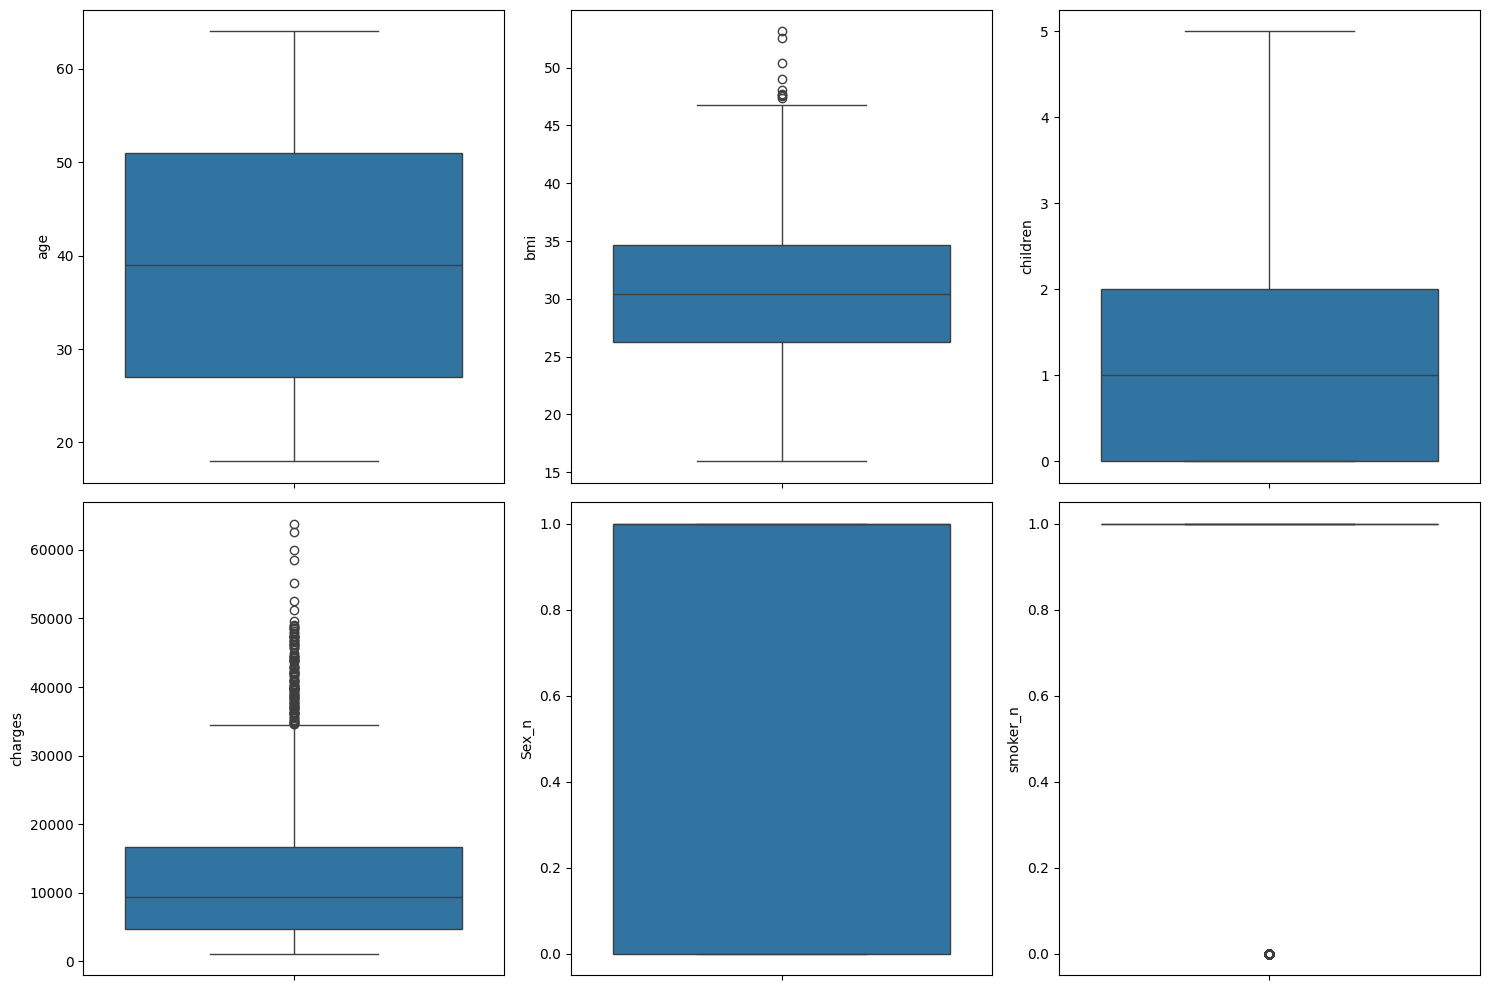

In [36]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dataset_seg, y = "age")
sns.boxplot(ax = axis[0, 1], data = dataset_seg, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = dataset_seg, y = "children")
sns.boxplot(ax = axis[1, 0], data = dataset_seg, y = "charges")
sns.boxplot(ax = axis[1, 1], data = dataset_seg, y = "Sex_n")
sns.boxplot(ax = axis[1, 2], data = dataset_seg, y = "smoker_n")


plt.tight_layout()

plt.show()

In [40]:
bmi_stats = dataset_seg["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [42]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")



Los límites superior e inferior para la búsqueda de outliers son 47.29 y 13.7, con un rango intercuartílico de 8.4


In [43]:
dataset_seg[dataset_seg["bmi"] > 48]

,age,sex,bmi,children,smoker,charges,Sex_n,smoker_n
116,58,male,49.06,0,no,11381.3254,1,1
286,46,female,48.07,2,no,9432.9253,0,1
847,23,male,50.38,1,no,2438.0552,1,1
1047,22,male,52.58,1,yes,44501.3982,1,0
1317,18,male,53.13,0,no,1163.4627,1,1


No se eliminaran estos outliers por la correlacion que existe entre esta variablr (bmi) y la variable objetivo en este caso charge

Análisis de valores faltantes

In [44]:
dataset_seg.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
Sex_n       0
smoker_n    0
dtype: int64

In [45]:
dataset_seg.drop(["sex", "smoker"], axis=1, inplace=True)
dataset_seg.sample(10)

,age,bmi,children,charges,Sex_n,smoker_n
352,30,27.700,0,3554.20300,0,1
193,56,26.600,1,12044.34200,0,1
273,50,27.455,1,9617.66245,1,1
635,64,38.190,0,14410.93210,1,1
685,53,26.410,2,11244.37690,1,1
723,19,35.400,0,1263.24900,1,1
1205,35,17.860,1,5116.50040,1,1
70,27,24.750,0,16577.77950,0,0
598,43,32.600,2,7441.50100,1,1
1002,24,25.800,0,1972.95000,1,1


Escalado de valores

In [47]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "bmi", "children","Sex_n", "smoker_n"]

# Dividimos el conjunto de datos en muestras de train y test
X = dataset_seg.drop("charges", axis = 1)[num_variables]
y = dataset_seg["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,children,Sex_n,smoker_n
560,46,19.95,2,0,1
1285,47,24.32,0,0,1
1142,52,24.86,0,0,1
969,39,34.32,5,0,1
486,54,21.47,3,0,1


Normalización

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,age,bmi,children,Sex_n,smoker_n
560,0.472227,-1.756525,0.734336,-1.024602,0.508747
1285,0.543313,-1.033082,-0.911192,-1.024602,0.508747
1142,0.898745,-0.943687,-0.911192,-1.024602,0.508747
969,-0.025379,0.622393,3.202629,-1.024602,0.508747
486,1.040918,-1.504893,1.557100,-1.024602,0.508747


Escalado Mínimo-Máximo

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,bmi,children,Sex_n,smoker_n
560,0.608696,0.107345,0.4,0.0,1.0
1285,0.630435,0.224913,0.0,0.0,1.0
1142,0.739130,0.239440,0.0,0.0,1.0
969,0.456522,0.493947,1.0,0.0,1.0
486,0.782609,0.148238,0.6,0.0,1.0


 Selección de características

In [50]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/workspaces/Regresion_Lineal/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,bmi,children,Sex_n,smoker_n
0,46.0,19.95,2.0,0.0,1.0
1,47.0,24.32,0.0,0.0,1.0
2,52.0,24.86,0.0,0.0,1.0
3,39.0,34.32,5.0,0.0,1.0
4,54.0,21.47,3.0,0.0,1.0


In [51]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

In [53]:
X_train_sel.to_csv("/workspaces/Regresion_Lineal/data/processed/clean_seguro_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Regresion_Lineal/data/processed/clean_seguro_test.csv", index=False)